In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
from graphs.utils import *

In [2]:
from pathlib import Path
import json

DATA_ROOT = Path('graphs/data/2025-09-17')
DATASET_FILES = {
    'data1': 'lorentzian-echo-False-2d-200.0-us-0.9999.json',
    'data2': 'lorentzian-echo-False-2d-30.0-us-0.0002.json',
    'data3': 'lorentzian-echo-True-2d-30.0-us-0.0002.json',
}

T2 = 15e-6  # seconds
T2_limit = 1 / (np.pi * T2)

state_0, state_1 = 0.32, 0.9
a = state_1 - state_0  # should be 1
b = (state_1 + state_0) / 2  # should be 0.5
print(f"a: {a}, b: {b}")


def scale(z, span=a, offset=b):
    """Scale probabilities to [0, 1] using the measured offset and span."""
    return (z - offset) / span + 0.5


def load_dataset(label):
    with (DATA_ROOT / DATASET_FILES[label]).open() as file:
        return json.load(file)


data1, data2, data3 = (load_dataset(label) for label in ('data1', 'data2', 'data3'))

for label, data in zip(('data1', 'data2', 'data3'), (data1, data2, data3)):
    count = len(data['sweep_parameters']['detuning'])
    print(f"{label}: {count} detuning points")



a: 0.5800000000000001, b: 0.61
data1: 152 detuning points
data2: 202 detuning points
data3: 202 detuning points


create square pulse sim


In [ ]:
from scriptos.spectroscopy_vs_amplitude import run_all, plot_1d, plot_2d
from simi.args import qubit_args, MHz
from matplotlib import pyplot as plt
from numpy import pi


qubit_args['cutoff'] = 2e-4
qubit_args['rabi_points'] = 101
qubit_args['detuning_points'] = 152
qubit_args['detuning_span'] = 0.5 * MHz*2 * pi
qubit_args['cutoff'] = 0.9999
qubit_args['rabi_frequency'] = 0.5 * MHz*2 * pi
qubit_args['echo'] = False
qubit_args['pulse_length'] = 200e-6
detunings, amplitudes, z = run_all(args=qubit_args)

T1: 30.00 us
T2: 15.00 us
T2 limit: 21.22 kHz
broadening condition:
14.142135623730953 kHz
Amplitude = 0/101
Amplitude = 1/101
Amplitude = 2/101
Amplitude = 3/101
Amplitude = 4/101
Amplitude = 5/101
Amplitude = 6/101
Amplitude = 7/101
Amplitude = 8/101
Amplitude = 9/101
Amplitude = 10/101
Amplitude = 11/101
Amplitude = 12/101
Amplitude = 13/101
Amplitude = 14/101
Amplitude = 15/101
Amplitude = 16/101
Amplitude = 17/101
Amplitude = 18/101
Amplitude = 19/101
Amplitude = 20/101
Amplitude = 21/101
Amplitude = 22/101
Amplitude = 23/101
Amplitude = 24/101
Amplitude = 25/101
Amplitude = 26/101


(<Axes: xlabel='Detuning [MHz]', ylabel='Rabi Amplitude [MHz]'>,
 <matplotlib.collections.QuadMesh at 0x139843080>)

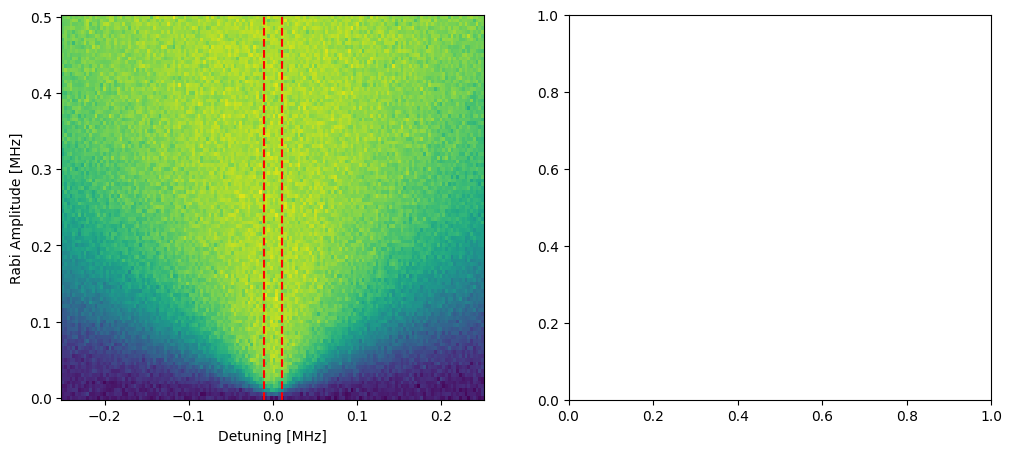

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
z_noise = z + np.random.normal(0, 0.02, z.shape,)
np.random.seed(42)
plot_2d(axes[0], detunings / 2 / pi / MHz, amplitudes / 2 / pi / MHz, z_noise)


In [ ]:
from scriptos.spectroscopy_vs_amplitude import run_all, plot_1d, plot_2d
from simi.args import qubit_args, MHz
from matplotlib import pyplot as plt
from numpy import pi


qubit_args['cutoff'] = 2e-4
qubit_args['rabi_points'] = 101
qubit_args['detuning_points'] = 202
qubit_args['detuning_span'] = 0.5 * MHz*2 * pi
qubit_args['rabi_frequency'] = 50 * MHz*2 * pi
qubit_args['echo'] = False
qubit_args['pulse_length'] = 40e-6
detunings, amplitudes, z_echo = run_all(args=qubit_args)

Amplitude = 0/101
Amplitude = 1/101
Amplitude = 2/101
Amplitude = 3/101
Amplitude = 4/101
Amplitude = 5/101
Amplitude = 6/101
Amplitude = 7/101
Amplitude = 8/101
Amplitude = 9/101
Amplitude = 10/101
Amplitude = 11/101
Amplitude = 12/101
Amplitude = 13/101
Amplitude = 14/101
Amplitude = 15/101
Amplitude = 16/101
Amplitude = 17/101
Amplitude = 18/101
Amplitude = 19/101
Amplitude = 20/101
Amplitude = 21/101
Amplitude = 22/101
Amplitude = 23/101
Amplitude = 24/101
Amplitude = 25/101
Amplitude = 26/101
Amplitude = 27/101
Amplitude = 28/101
Amplitude = 29/101
Amplitude = 30/101
Amplitude = 31/101
Amplitude = 32/101
Amplitude = 33/101
Amplitude = 34/101
Amplitude = 35/101
Amplitude = 36/101
Amplitude = 37/101
Amplitude = 38/101
Amplitude = 39/101
Amplitude = 40/101
Amplitude = 41/101
Amplitude = 42/101
Amplitude = 43/101
Amplitude = 44/101
Amplitude = 45/101
Amplitude = 46/101
Amplitude = 47/101
Amplitude = 48/101
Amplitude = 49/101
Amplitude = 50/101
Amplitude = 51/101
Amplitude = 52/101
Amp

(<Axes: xlabel='Detuning [MHz]', ylabel='Rabi Amplitude [MHz]'>,
 <matplotlib.collections.QuadMesh at 0x149ee3200>)

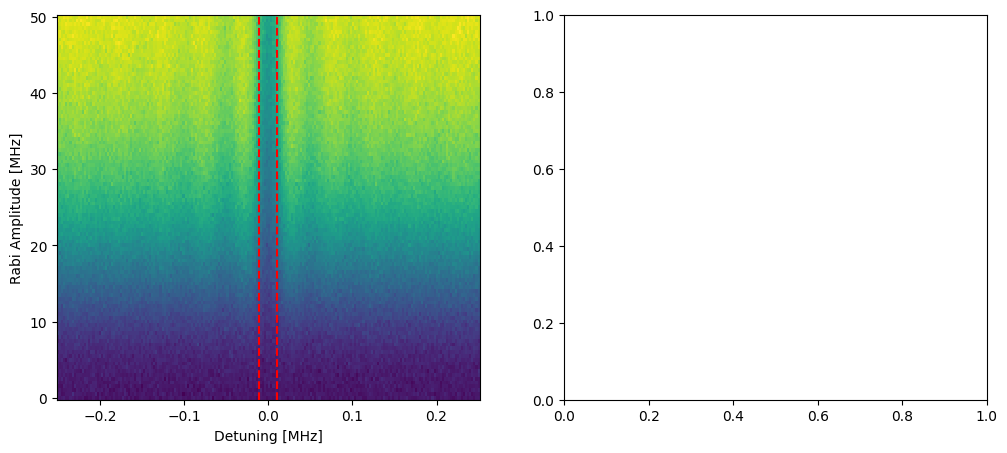

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
z_noise_echo = z_echo + np.random.normal(0, 0.01, z_echo.shape,)
np.random.seed(42)
plot_2d(axes[0], detunings / 2 / pi / MHz, amplitudes / 2 / pi / MHz, z_noise_echo)

/var/folders/5l/mx_yndbx4sq978lx9ht2346r0000gn/T/ipykernel_42668/1038612848.py:64: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='lower right')


mu 0
mu -7691.927994610664
mu 0
mu -361.2615597583867
mu 4333.20207601339
mu -132.21297160021211
mu 414.8321522595345
mu 514.3941888425697
mu 37.30613037307794
mu 708.7223766497714
mu 0
mu 11997.25557485351


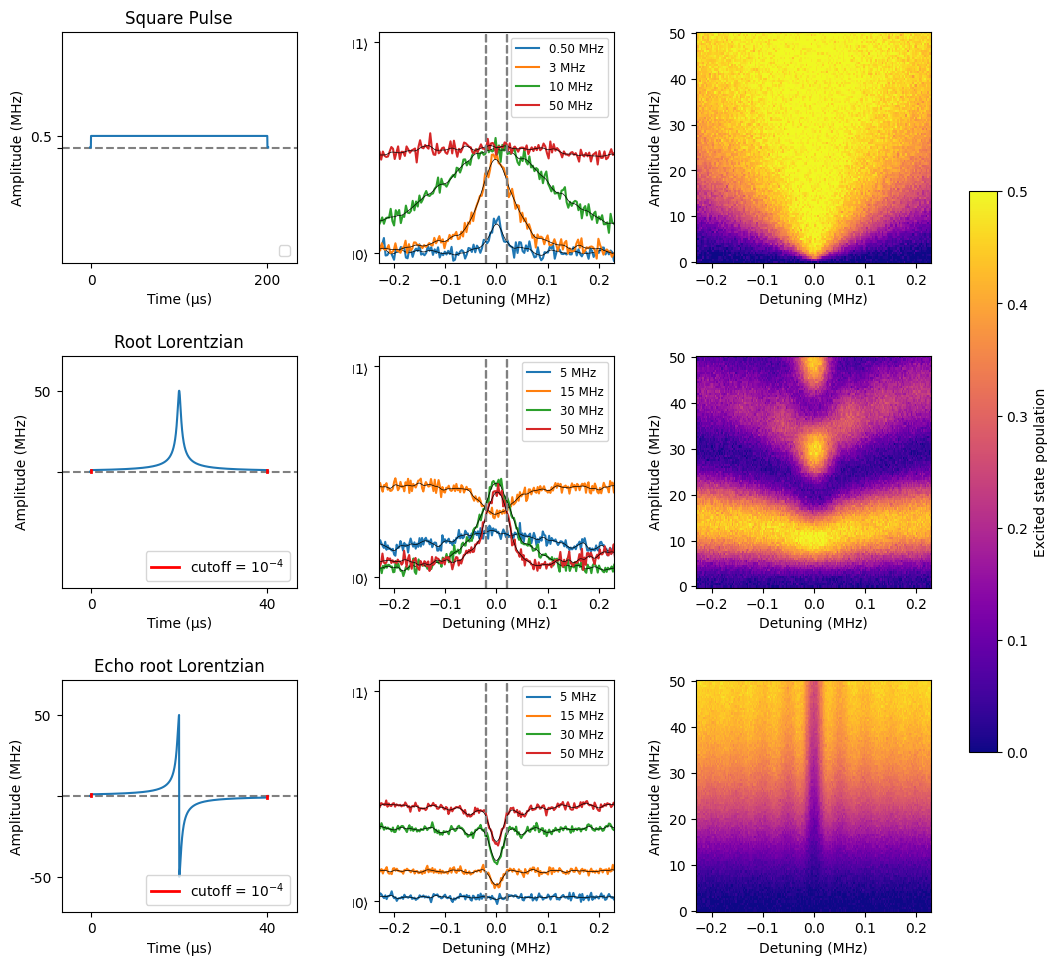

In [ ]:
def square(x, width):
    return (np.heaviside(x + width / 2, 0) - np.heaviside(x - width / 2, 0))


def lorentzian(x, x0, gamma, A):
    return A * (gamma**2 / ((x - x0) ** 2 + gamma**2))**(1/2)


def echo_lorentzian(x, x0, gamma, A):
    return A * (gamma**2 / ((x - x0) ** 2 + gamma**2))**(1/2) * (2 * np.heaviside(-x, 0) - 1)


def plot_pulse(ax, pulse_length, title, type='0'):
    t = np.linspace(-pulse_length/2*1.01, pulse_length/2*1.01, 1000)
    ax.axhline(0, color="gray", linestyle="--")

    gamma = pulse_length/100

    if type == '0':
        A = 0.2
        ax.set_yticks([0, A], [f"", f"{0.5}"])

        envelope = A*square(t, pulse_length)
        ax.plot(t * 1e6, envelope, color="C0")

    elif type == '1':
        A = 1.4
        lc = lorentzian(pulse_length/2, 0, gamma, A)

        ax.set_yticks([0, A], [f"", f"{50}"])

        envelope = lorentzian(t, 0, gamma, A)*square(t, pulse_length)
        ax.plot(t * 1e6, envelope, color="C0")

        ax.plot([pulse_length/2*1e6, pulse_length/2*1e6],
                [0, lc], color="r", alpha=1, linewidth=2, label=r'cutoff = $10^{-4}$')
        ax.plot([-pulse_length/2*1e6, -pulse_length/2*1e6],
                [0, lc], color="r", alpha=1, linewidth=2)
    elif type == '2':

        A = 1.4
        ax.set_yticks([-A, 0, A], [f"{-50}", f"", f"{50}"])
        lc = lorentzian(pulse_length/2, 0, gamma, A)

        envelope = echo_lorentzian(
            t, 0, gamma, A)*square(t, pulse_length)
        ax.plot(t * 1e6, envelope, color="C0")

        ax.plot([pulse_length/2*1e6, pulse_length/2*1e6],
                [0, -lc], color="r", alpha=1, linewidth=2, label=r'cutoff = $10^{-4}$')
        ax.plot([-pulse_length/2*1e6, -pulse_length/2*1e6],
                [0, lc], color="r", alpha=1, linewidth=2)
    else:
        raise ValueError("Invalid pulse type")
    # envelope = np.sin(np.pi * t / pulse_length) ** 2
    ax.set_xticks([-pulse_length/2*1e6, pulse_length/2*1e6],
                  [f"{0}", f"{pulse_length*1e6:.0f}"])

    ax.set_title(title)
    ax.set_xlabel("Time (µs)")
    ax.set_ylabel("Amplitude (MHz)")
    ax.set_xlim(-pulse_length*2/3 * 1e6, pulse_length*2/3 * 1e6)
    ax.set_ylim(-2, 2)
    ax.legend(loc='lower right')


def plot_2d_data(ax, data, title, echo=False, scale_data=True):
    sweep = data["sweep_parameters"]
    meas = data["measured_data"]
    x_data = np.asarray(sweep["detuning"])
    y_data = np.asarray(sweep["amplitudes"])
    z_data = np.asarray(meas["states"])

    if scale_data:
        z_data = scale(z_data, a)

    mus, fwhms, snrs = FWHM_2D(x_data, y_data, z_data, echo=echo)
    ax.set_title(title)
    ax.set_xlabel("Detuning (MHz)")
    ax.set_ylabel("Amplitude (MHz)")
    # ax.plot((fwhms / 2) / 1e6, y_data, "--", color="k", alpha=0.3)
    # ax.plot(-(fwhms / 2) / 1e6, y_data, "--", color="k", alpha=0.3)
    mu_avg = np.mean(mus)
    x_data -= mu_avg * 1.1
    p = ax.pcolormesh(x_data / 1e6, y_data, z_data,
                      shading="auto", cmap="plasma", vmin=0, vmax=0.5)
    # ax.plot((mus - mu_avg) / 1e6, y_data, ".-", color="r", alpha=0.1)
    ax.set_xlim(-0.23, 0.23)
    return p


def plot_1d_data(ax, data, index, title, color, echo=False, scale_data=True):
    sweep = data["sweep_parameters"]
    meas = data["measured_data"]
    x_data = np.asarray(sweep["detuning"])
    y_data = np.asarray(sweep["amplitudes"])
    z_data = np.asarray(meas["states"])

    if scale_data:
        z_data = scale(z_data, a)

    z_data = z_data[index, :]
    
    z_data_dense = interp1d(x_data, z_data, kind='cubic')
    # x_data_dense = np.linspace(x_data.min(), x_data.max(), 1000)
    z_data_smooth = gaussian_filter(z_data, sigma=2)
    mu, fwhm, snr = FWHM(x_data, z_data, plot=False, echo=echo)

    x_data -= mu

    print("mu", mu)

    ax.set_title(title)

    ax.set_xlabel("Detuning (MHz)")
    # ax.set_ylabel("Signal ")

    amp = y_data[index]
    if amp < 1:
        l = f"{amp:.2f} MHz"
    else:
        l = f"{amp:.0f} MHz"
    ax.plot(x_data / 1e6, z_data, "-",  alpha=1,
            markersize=0.5, color=color, label=l)
    ax.plot(x_data / 1e6, z_data_smooth, "-", color='k', linewidth=0.5)

    # ax.plot(x_data/1e6, z_data, ".-", color="C0")
    # ax.axvline(0, color="r", linestyle="--")

    ax.set_xlim(-0.23, 0.23)
    ax.set_ylim(-0.05, 1.05)

    ax.set_yticks([0, 1], [r"\left|0\right\rangle$", r"\left|1\right\rangle$"])
    ax.set_yticklabels(
        [r"$\left|0\right\rangle$", r"$\left|1\right\rangle$"])  # labels

    ax.legend(fontsize=8.5)
    ax.axvline(T2_limit/1e6, color='gray', linestyle='--')
    ax.axvline(-T2_limit/1e6, color='gray', linestyle='--')


data1['measured_data']['states'] = z_noise
data1['sweep_parameters']['amplitudes'] = amplitudes/2/pi/1e6


data3['measured_data']['states'] = z_noise_echo


fig, axs = plt.subplots(3, 3, figsize=(11, 10))

plot_pulse(axs[0, 0], 200e-6, "Square Pulse", type='0')
plot_pulse(axs[1, 0], 40e-6, "Root Lorentzian", type='1')
plot_pulse(axs[2, 0], 40e-6, "Echo root Lorentzian", type='2')


p = plot_2d_data(axs[0, 2], data1, "", scale_data=False)
plot_2d_data(axs[1, 2], data2, "",)
plot_2d_data(axs[2, 2], data3, "", echo=True,scale_data=False)

indexes = [10, 30, 60, 100]

for c, i in enumerate(indexes):
    plot_1d_data(axs[1, 1], data2, i, "", color=f"C{c}")
    plot_1d_data(axs[2, 1], data3, i, "", echo=True, color=f"C{c}",scale_data=False)

indexes = [1, 5, 20, 100]

for c, i in enumerate(indexes):
    plot_1d_data(axs[0, 1], data1, i, "", color=f"C{c}", scale_data=False)
  

# for i in indexes:

# plt.ylim(-0.05, 1.05)
# plt.show()

plt.subplots_adjust(left=0.07, right=0.92, top=0.95,
                    bottom=0.07, wspace=0.35, hspace=0.4)
fig.colorbar(p, ax=axs, orientation="vertical",
             label="Excited state population", fraction=0.03, pad=0.04)


# plt.tight_layout()

plt.savefig("graphs/figs/2d_data_comparison.png", dpi=300)

mu 0
mu 45666.183279491364
mu 0
mu -17540.033666045467


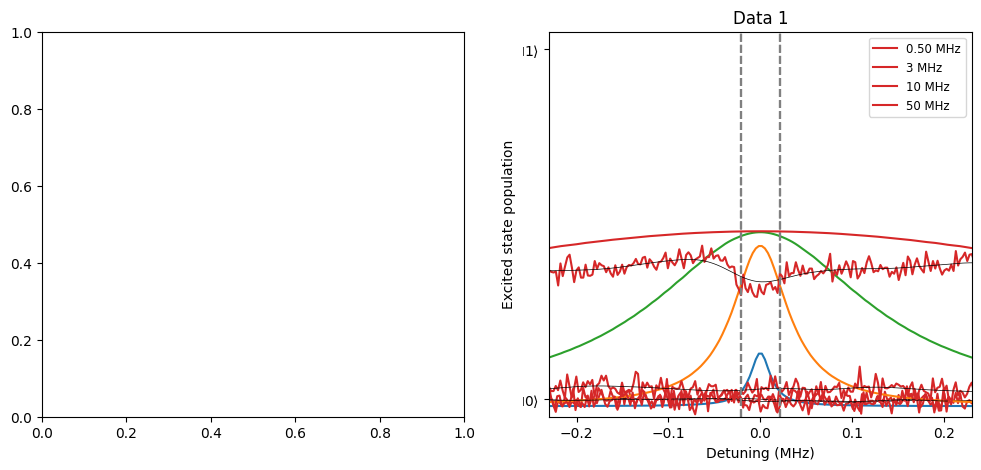

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


for i in indexes:
    plot_1d(axes[1], detunings / 2 / pi / MHz, z[i]-0.02)
    plot_1d_data(axes[1], data3, i, "Data 1", color=f"C{c}", echo=True)

plt.ylim(-0.05, 1.05)
plt.show()